In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# plt.rcParams['font.sans-serif']=['Microsoft Yahei']
plt.rcParams['font.sans-serif']=['SimHei']
%matplotlib inline

In [2]:
organization = pd.read_csv('./output/organization.csv', encoding='utf8', index_col='id')

# 省份分布

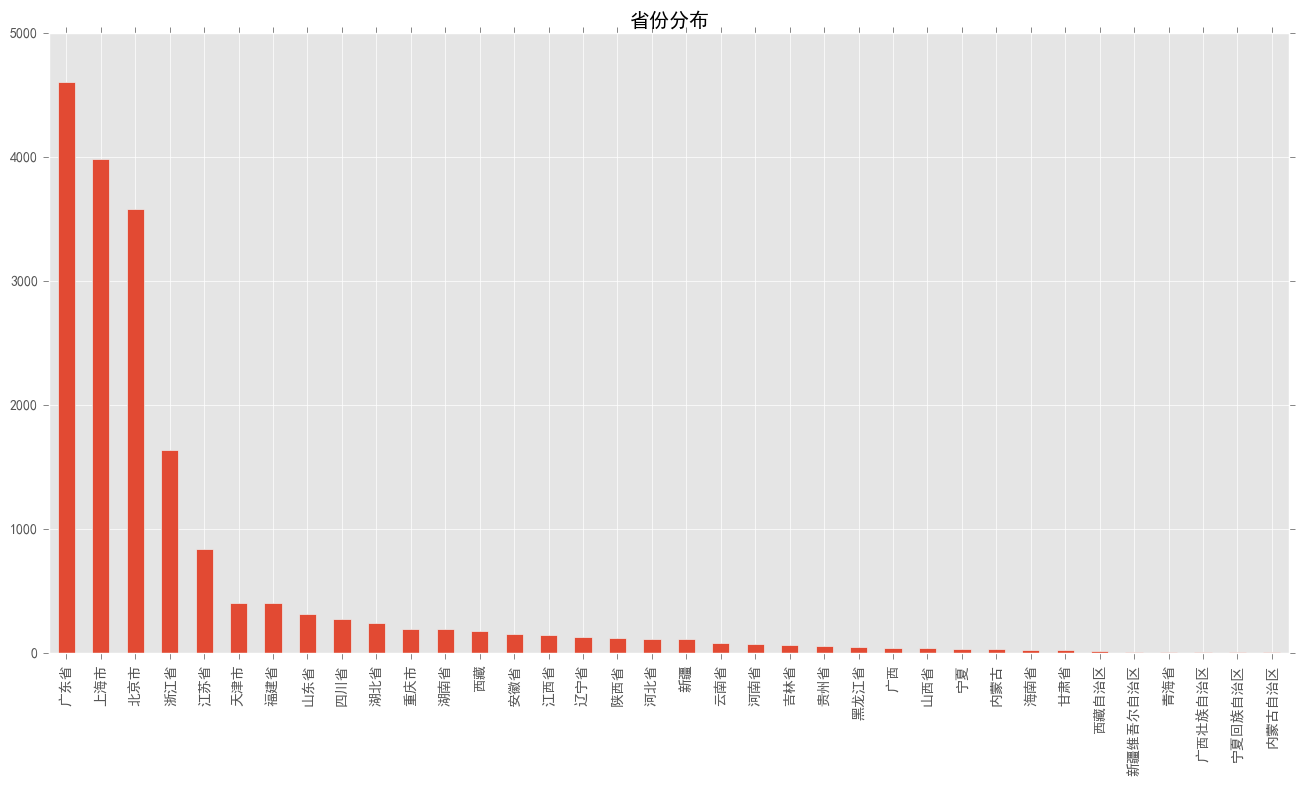

In [3]:
plt.figure(figsize=(16, 8))
organization['registerProvince'].value_counts().plot(kind='bar')
plt.title(u'省份分布')
plt.show()

# 城市分布

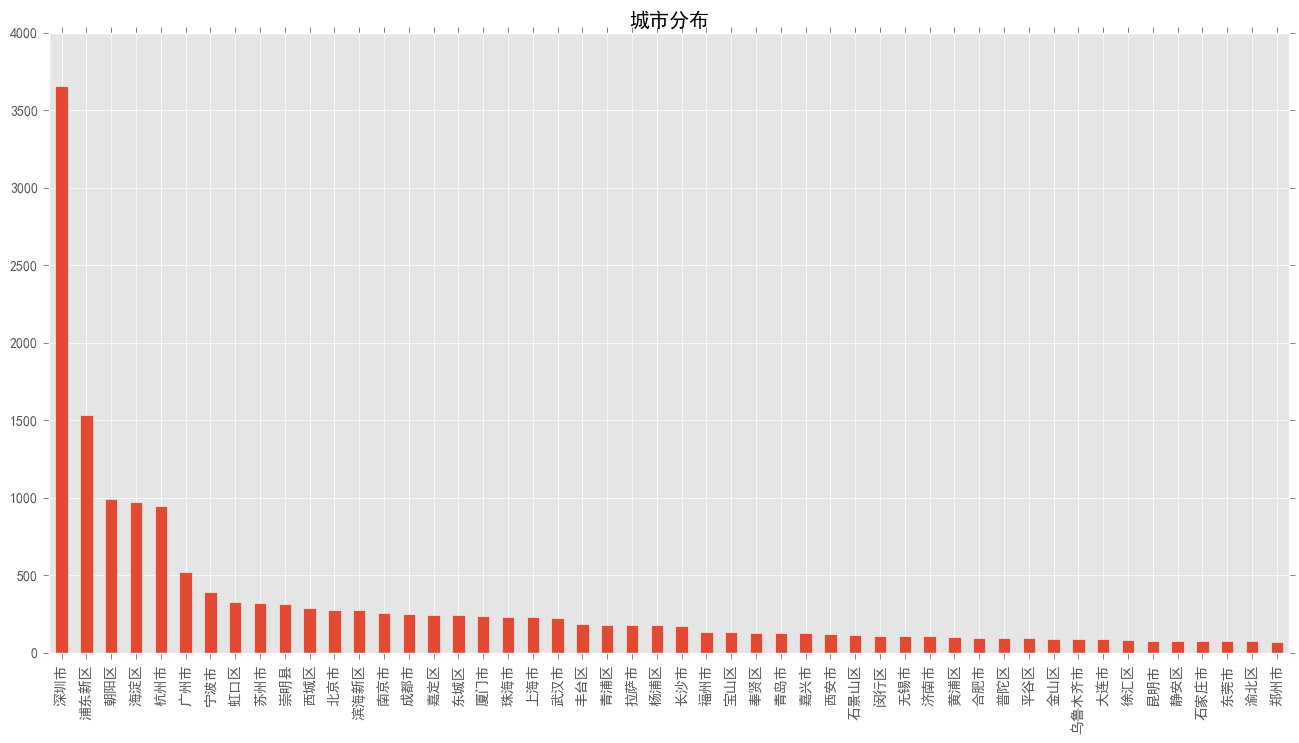

In [4]:
plt.figure(figsize=(16, 8))
organization['registerCity'].value_counts().head(50).plot(kind='bar')
plt.title(u'城市分布')
plt.show()

# 基金规模和基金产品数量

目前注册基金机构有18212家，基金产品总数有58399支, 总规模为11.59万亿

基金规模的中位数为3000万, 均值为6.3657亿, 最大规模为1487.5697亿

在除去规模为0的机构后，基金规模的中位数为5048万，均值为7.509亿

各个机构的基金数量中位数为1, 均值为2.69, 最大为538支产品

In [5]:
organization[['fundScale', 'fundCount']].describe().T

,count,mean,std,min,25%,50%,75%,max
fundScale,18212.0,63657.008415,422851.171751,0.0,500.0,3000.0,18811.9875,14875696.97
fundCount,18212.0,2.698825,8.121318,0.0,1.0,1.0,2.0000,538.00


In [6]:
fundScale = organization[u'fundScale']
fundScale = fundScale[fundScale!=0]

In [7]:
fundScale.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
fundScale,15439.0,75090.448686,458324.598015,1.202,1010.0,5047.74,24738.2107,14875696.97


# 基金规模分布

基金规模小于1亿的机构数量占比: 58.89%
基金规模小于1亿的规模占比: 1.90%


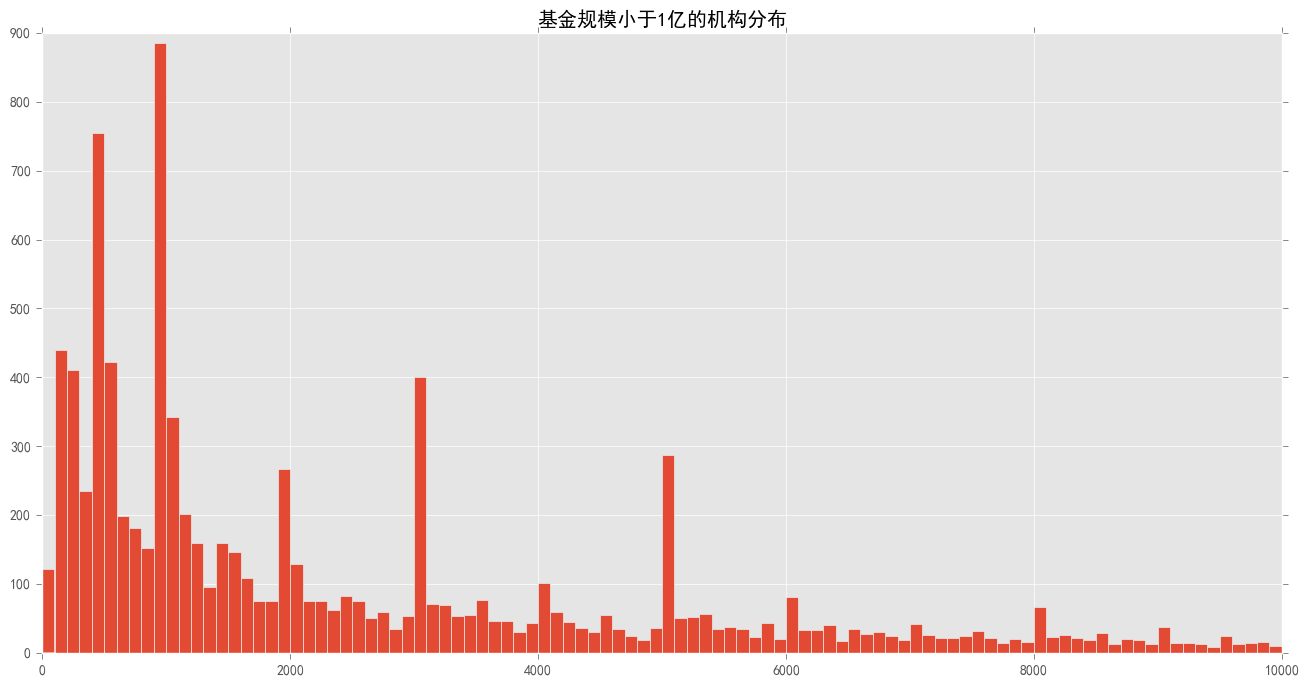

In [8]:
print u"基金规模小于1亿的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[fundScale<1e4]) / len(fundScale) * 100)
print u"基金规模小于1亿的规模占比: %0.2f%%" % (fundScale[fundScale<1e4].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[fundScale<1e4], bins=100)
plt.title(u'基金规模小于1亿的机构分布')
plt.show()

基金规模1亿至10亿的机构数量占比: 27.88%
基金规模1亿至10亿的规模占比: 12.06%


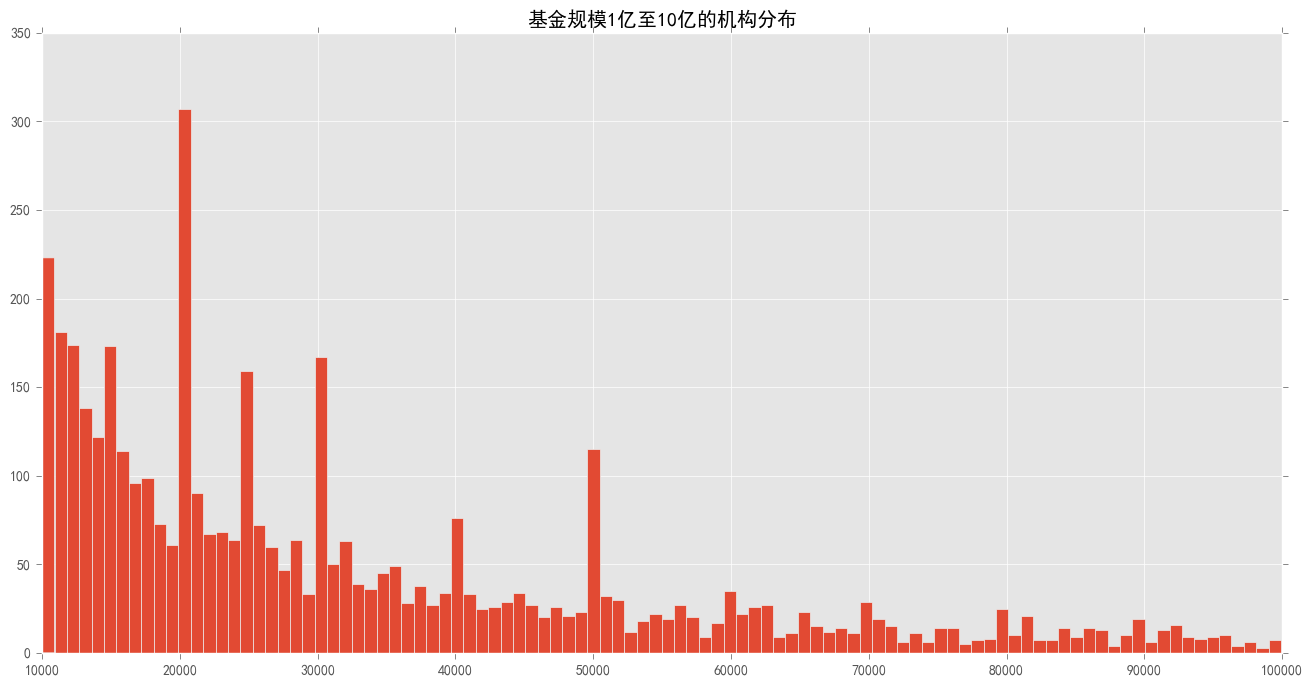

In [9]:
print u"基金规模1亿至10亿的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[(1e4<fundScale) & (fundScale<1e5)]) / len(fundScale) * 100)
print u"基金规模1亿至10亿的规模占比: %0.2f%%" % (fundScale[(1e4<fundScale) & (fundScale<1e5)].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[(1e4<fundScale) & (fundScale<1e5)], bins=100)
plt.title(u'基金规模1亿至10亿的机构分布')
plt.show()

基金规模100亿至1000亿的的机构数量占比: 1.24%
基金规模100亿至1000亿的的规模占比: 38.20%


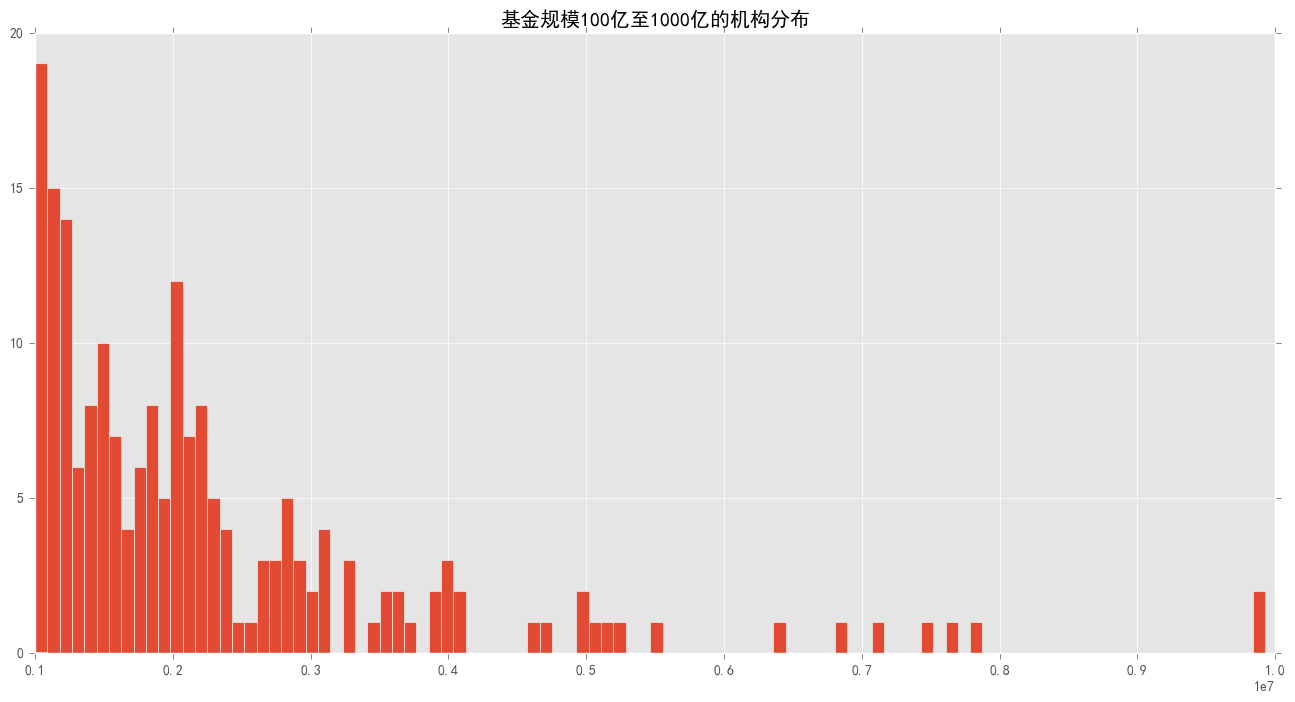

In [10]:
print u"基金规模100亿至1000亿的的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[(1e6<fundScale) & (fundScale<1e7)]) / len(fundScale) * 100)
print u"基金规模100亿至1000亿的的规模占比: %0.2f%%" % (fundScale[(1e6<fundScale) & (fundScale<1e7)].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[(1e6<fundScale) & (fundScale<1e7)], bins=100)
plt.title(u'基金规模100亿至1000亿的机构分布')
plt.show()

基金规模1000亿以上的的机构数量占比: 0.07%
基金规模1000亿以上的规模占比: 11.20%


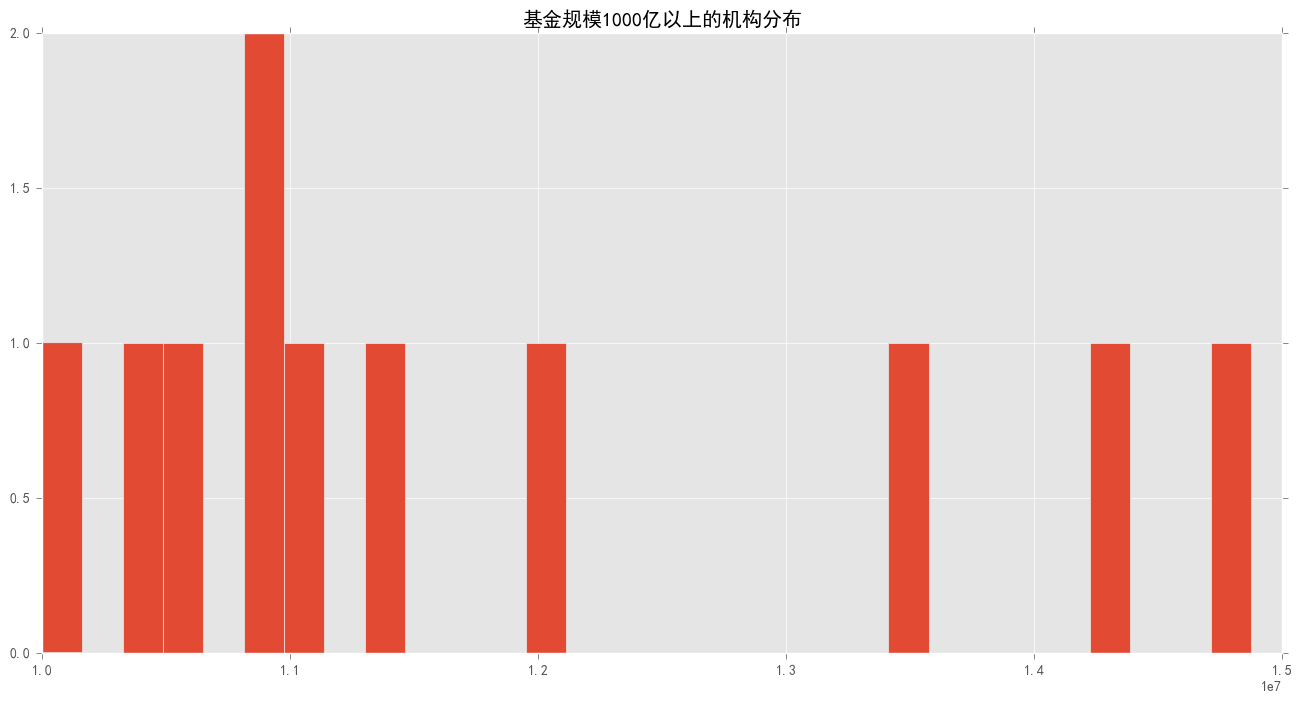

In [11]:
print u"基金规模1000亿以上的的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[1e7<fundScale]) / len(fundScale) * 100)
print u"基金规模1000亿以上的规模占比: %0.2f%%" % (fundScale[1e7<fundScale].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[1e7<fundScale], bins=30)
plt.title(u'基金规模1000亿以上的机构分布')
plt.show()

# 私募基金规模前20

In [12]:
organization.sort_values('fundScale', ascending=False)[['managerName', 'fundScale', 'fundCount', 'artificialPersonName', 'primaryInvestType', 'registerCity']].head(20)

,managerName,fundScale,fundCount,artificialPersonName,primaryInvestType,registerCity
id,,,,,,
63201,浦银（嘉兴）股权投资管理有限公司,1.487570e+07,16,余晓东,股权投资基金,嘉兴市
2206,信银（深圳）股权投资基金管理有限公司,1.431398e+07,25,孙莉,股权投资基金,深圳市
6756,深圳市平安德成投资有限公司,1.344697e+07,86,刘东,证券投资基金,深圳市
42972,中银城市发展资产管理（上海）有限公司,1.200375e+07,4,黎晓静,其他投资基金,浦东新区
6859,深圳市思道科投资有限公司,1.131716e+07,79,沈佳华,股权投资基金,深圳市
1986,兴业国信资产管理有限公司,1.113325e+07,77,倪勤,股权投资基金,虹口区
1492,长城（天津）股权投资基金管理有限责任公司,1.096000e+07,34,王海,股权投资基金,滨海新区
20706,安徽国厚投资管理有限公司,1.093735e+07,88,王东,股权投资基金,芜湖市
408,信达资本管理有限公司,1.057465e+07,44,肖林,股权投资基金,滨海新区


# 证券投资基金部分

目前注册证券投资基金机构有7951家，证券投资基金产品总数有28367支, 证券投资基金总规模为3万亿

基金规模的中位数为1578.31万, 均值为3.8592亿, 最大规模为1344.697亿

各个机构的基金数量中位数为1, 均值为3.57, 最大为538支产品

In [13]:
df = organization[organization['primaryInvestType'] == u'证券投资基金']
print u'证券投资基金机构数量占比: %0.2f%%' % (100.0 * len(df)/ len(organization))
print u'证券投资基金产品占比: %0.2f%%' % (100.0 * df['fundCount'].sum()/ organization['fundCount'].sum())
print u'证券投资基金规模占比: %0.2f%%' % (100.0 * df['fundScale'].sum()/ organization['fundScale'].sum())
df.describe()[['fundCount', 'fundScale']].T

证券投资基金机构数量占比: 43.66%
证券投资基金产品占比: 57.71%
证券投资基金规模占比: 26.47%


,count,mean,std,min,25%,50%,75%,max
fundCount,7951.0,3.567727,10.798971,0.0,1.0,1.00,3.00,5.380000e+02
fundScale,7951.0,38592.315236,289354.355971,0.0,500.0,1578.31,7831.24,1.344697e+07


# 证券投资基金规模前20

In [14]:
df.sort_values('fundScale', ascending=False)[['managerName', 'fundScale', 'fundCount', 'artificialPersonName', 'primaryInvestType', 'registerCity']].head(20)

,managerName,fundScale,fundCount,artificialPersonName,primaryInvestType,registerCity
id,,,,,,
6756,深圳市平安德成投资有限公司,1.344697e+07,86,刘东,证券投资基金,深圳市
3154,恒天中岩投资管理有限公司,9.929267e+06,538,李刚,证券投资基金,延庆县
9262,植瑞投资管理有限公司,7.809365e+06,193,于红梅,证券投资基金,宁波市
6419,大唐财富投资管理有限公司,6.413755e+06,79,张树林,证券投资基金,石景山区
31453,深圳阳宏资产管理有限公司,5.000050e+06,1,肖征,证券投资基金,深圳市
20351,上海融葵投资管理有限公司,4.720466e+06,63,王长松,证券投资基金,浦东新区
7927,陆家嘴财富管理（上海）有限公司,3.923962e+06,188,何勇,证券投资基金,浦东新区
101000000170,北京乐瑞资产管理有限公司,3.636076e+06,61,唐毅亭,证券投资基金,北京市
217,上海合晟资产管理股份有限公司,3.558545e+06,85,胡远川,证券投资基金,浦东新区


# 证券投资基金省份分布

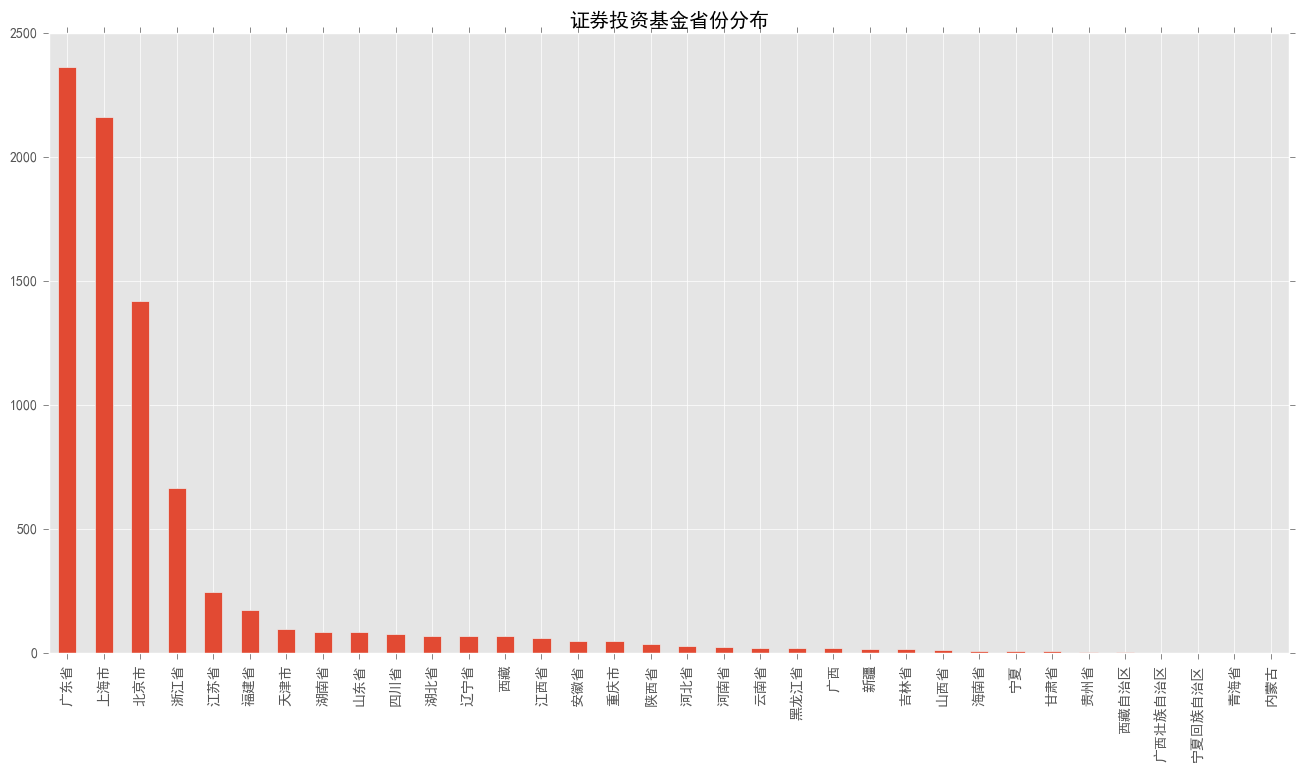

In [15]:
plt.figure(figsize=(16, 8))
df['registerProvince'].value_counts().plot(kind='bar')
plt.title(u'证券投资基金省份分布')
plt.show()

# 证券投资基金城市分布

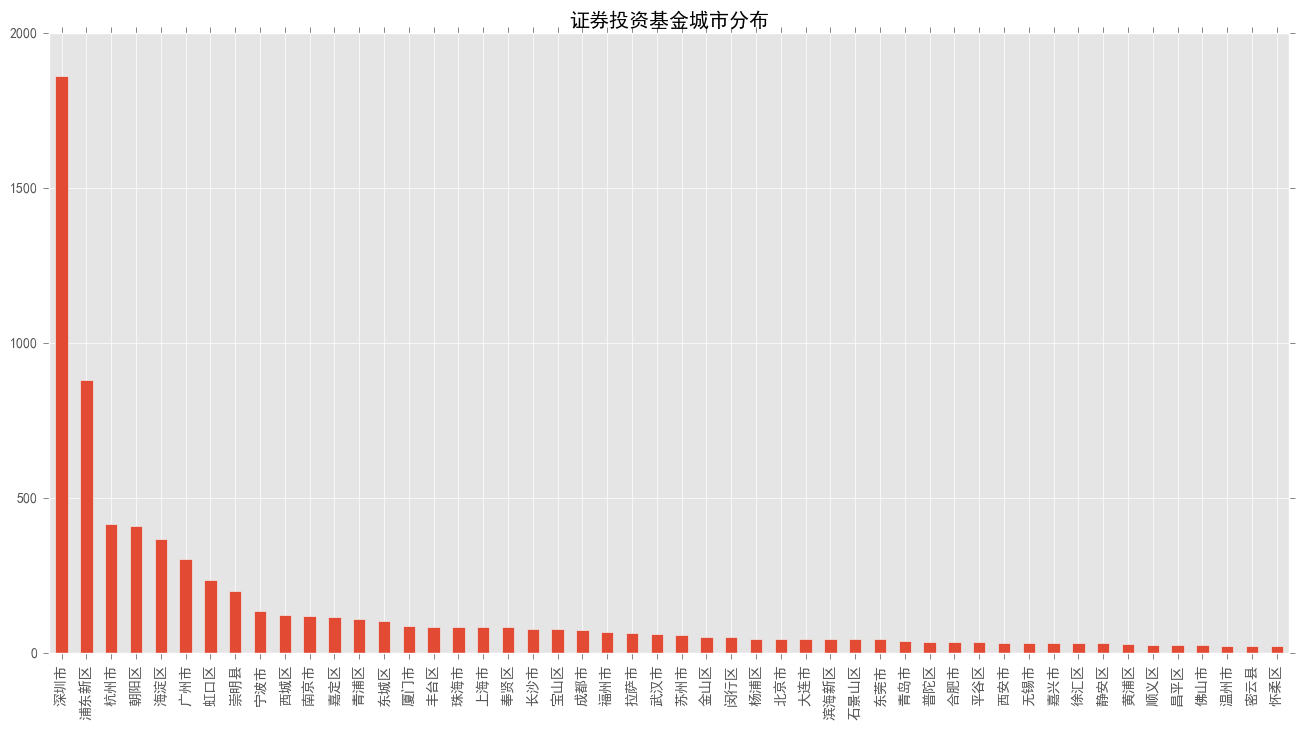

In [16]:
plt.figure(figsize=(16, 8))
df['registerCity'].value_counts().head(50).plot(kind='bar')
plt.title(u'证券投资基金城市分布')
plt.show()

# 证券投资基金分布

In [17]:
fundScale = df['fundScale']

证券投资基金规模小于1千万的机构数量: 2974家
证券投资基金规模小于1千万的机构数量占比: 37.40%
证券投资基金规模小于1千万的规模占比: 0.33%


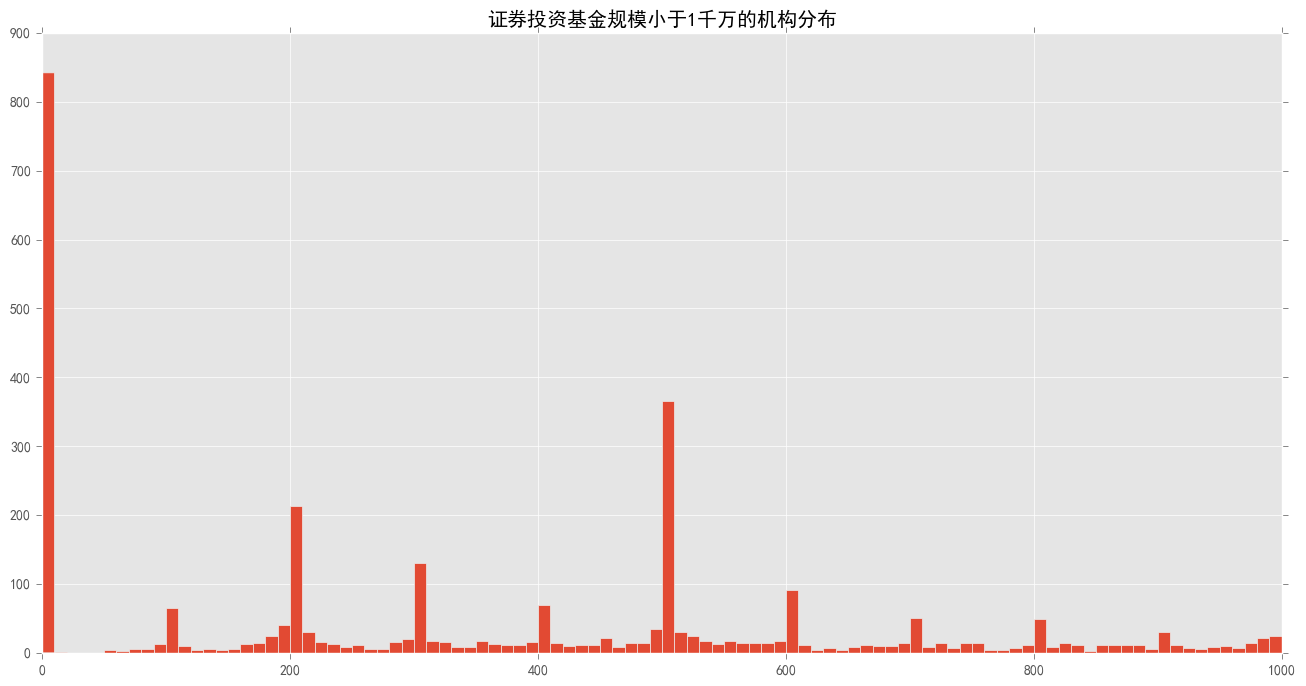

In [18]:
print u"证券投资基金规模小于1千万的机构数量: %d家" % len(fundScale[fundScale<1e3])
print u"证券投资基金规模小于1千万的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[fundScale<1e3]) / len(fundScale) * 100)
print u"证券投资基金规模小于1千万的规模占比: %0.2f%%" % (fundScale[fundScale<1e3].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[fundScale<1e3], bins=100)
plt.title(u'证券投资基金规模小于1千万的机构分布')
plt.show()

证券投资基金规模1千万至1亿的机构数量: 2891家
证券投资基金规模1千万至1亿的机构数量占比: 36.36%
证券投资基金规模1千万至1亿的规模占比: 3.33%


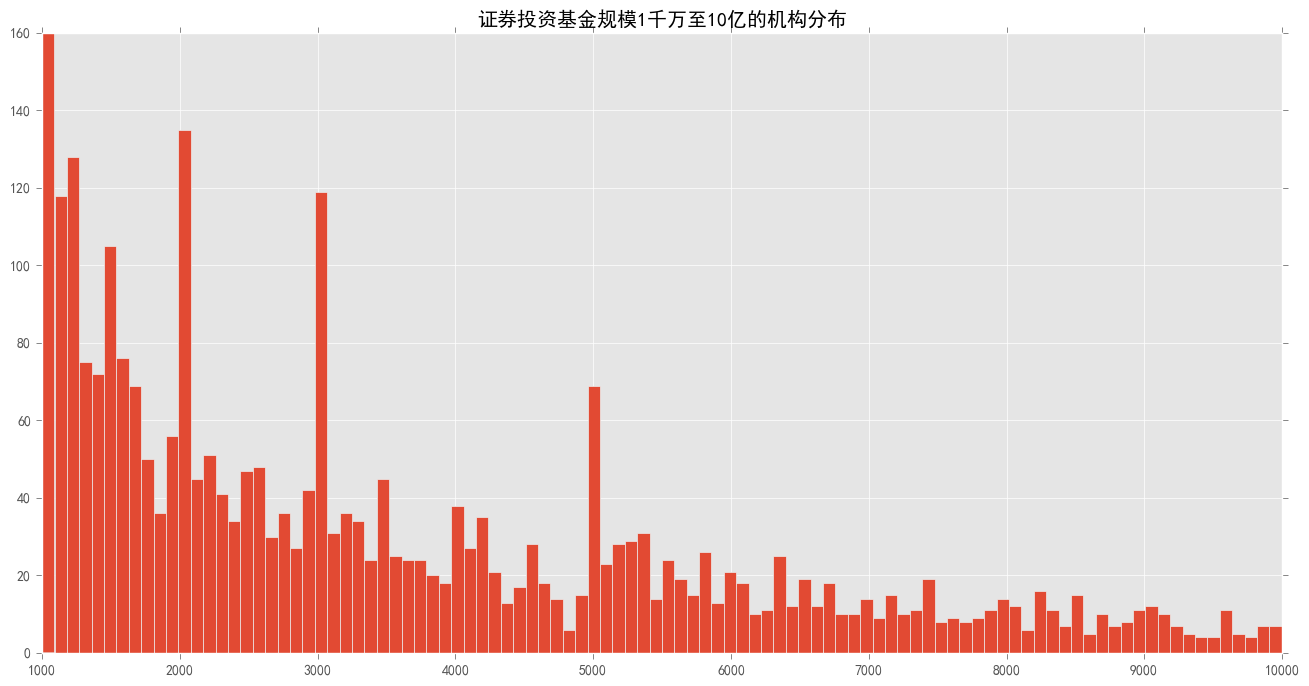

In [19]:
print u"证券投资基金规模1千万至1亿的机构数量: %d家" % len(fundScale[(1e3<fundScale) & (fundScale<1e4)])
print u"证券投资基金规模1千万至1亿的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[(1e3<fundScale) & (fundScale<1e4)]) / len(fundScale) * 100)
print u"证券投资基金规模1千万至1亿的规模占比: %0.2f%%" % (fundScale[(1e3<fundScale) & (fundScale<1e4)].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[(1e3<fundScale) & (fundScale<1e4)], bins=100)
plt.title(u'证券投资基金规模1千万至10亿的机构分布')
plt.show()

证券投资基金规模1亿至10亿的机构数量: 1300家
证券投资基金规模1亿至10亿的机构数量占比: 16.35%
证券投资基金规模1亿至10亿的规模占比: 13.45%


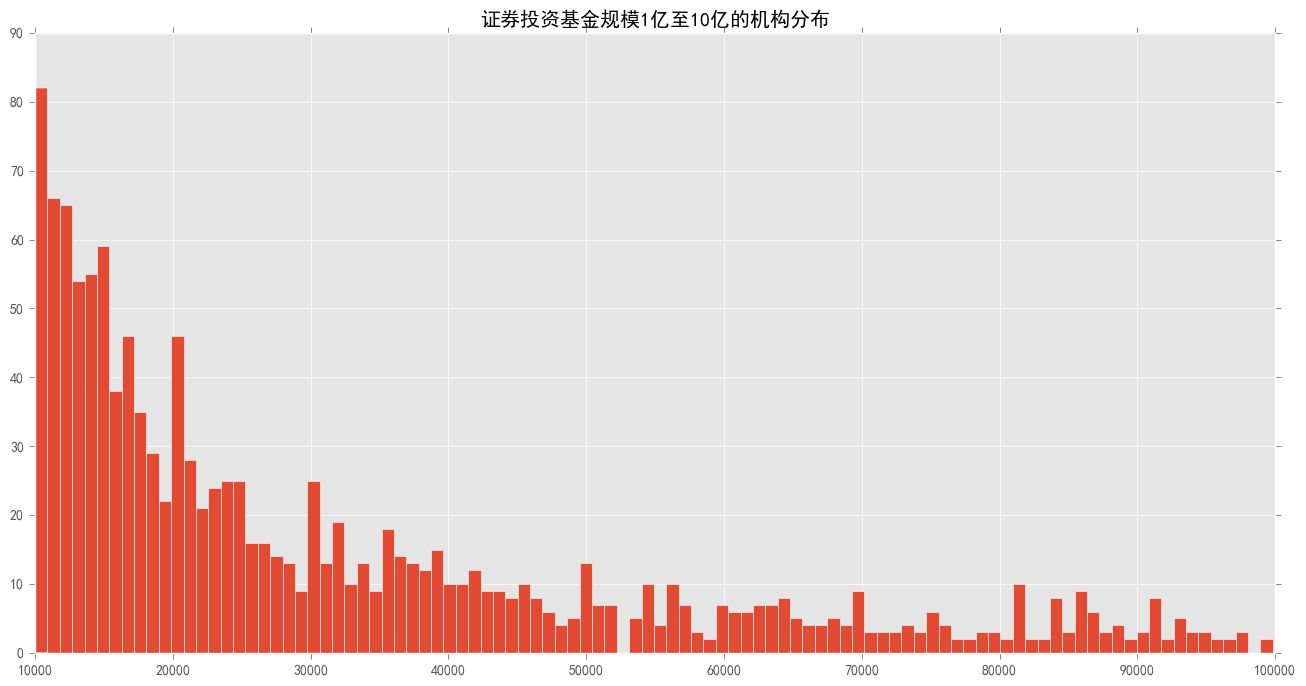

In [20]:
print u"证券投资基金规模1亿至10亿的机构数量: %d家" % len(fundScale[(1e4<fundScale) & (fundScale<1e5)])
print u"证券投资基金规模1亿至10亿的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[(1e4<fundScale) & (fundScale<1e5)]) / len(fundScale) * 100)
print u"证券投资基金规模1亿至10亿的规模占比: %0.2f%%" % (fundScale[(1e4<fundScale) & (fundScale<1e5)].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[(1e4<fundScale) & (fundScale<1e5)], bins=100)
plt.title(u'证券投资基金规模1亿至10亿的机构分布')
plt.show()

证券投资基金规模10亿至100亿的机构数量: 401家
证券投资基金规模10亿至100亿的机构数量占比: 5.04%
证券投资基金规模10亿至100亿的规模占比: 37.59%


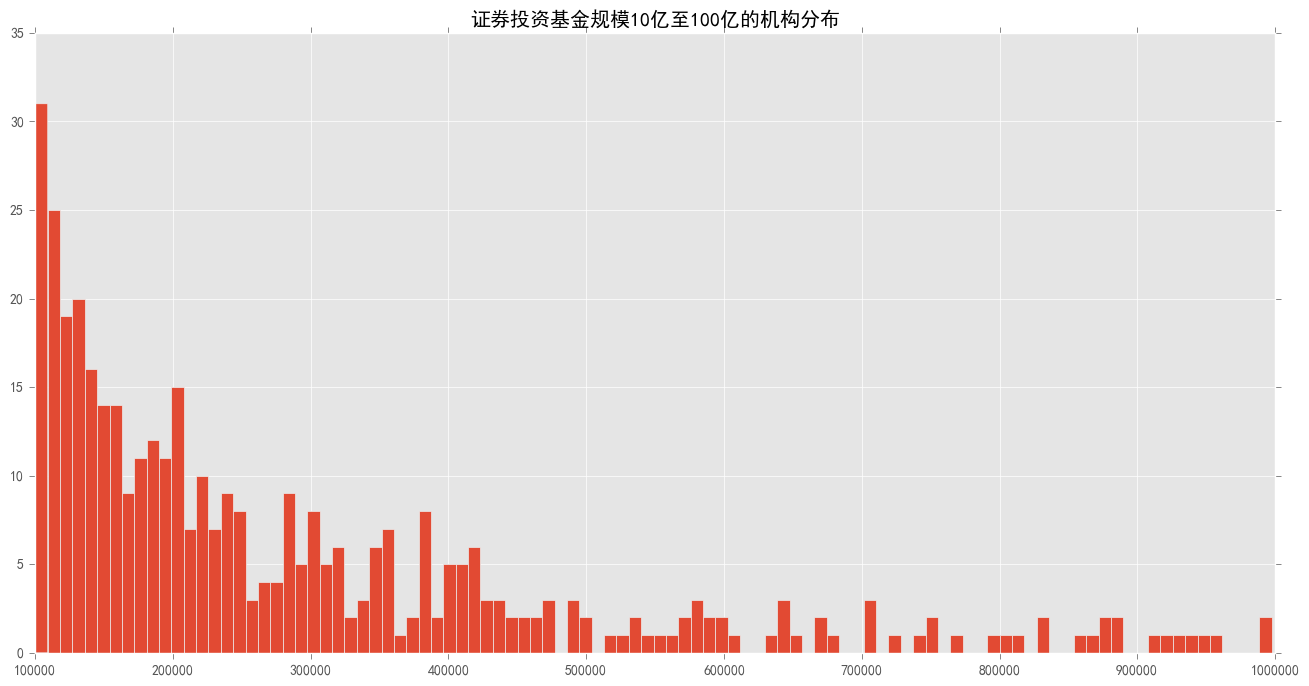

In [21]:
print u"证券投资基金规模10亿至100亿的机构数量: %d家" % len(fundScale[(1e5<fundScale) & (fundScale<1e6)])
print u"证券投资基金规模10亿至100亿的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[(1e5<fundScale) & (fundScale<1e6)]) / len(fundScale) * 100)
print u"证券投资基金规模10亿至100亿的规模占比: %0.2f%%" % (fundScale[(1e5<fundScale) & (fundScale<1e6)].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[(1e5<fundScale) & (fundScale<1e6)], bins=100)
plt.title(u'证券投资基金规模10亿至100亿的机构分布')
plt.show()

证券投资基金规模100亿以上的机构数量: 55家
证券投资基金规模100亿以上的机构数量占比: 0.69%
证券投资基金规模100亿以上的规模占比: 45.02%


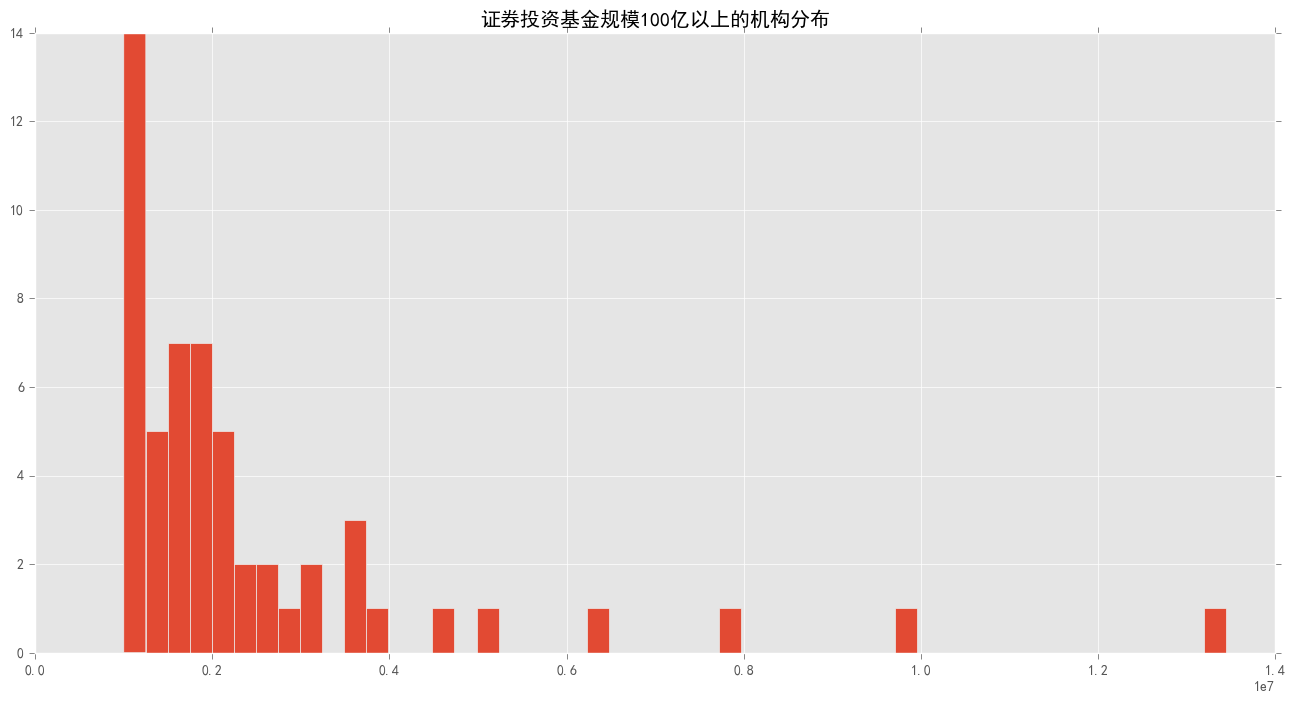

In [22]:
print u"证券投资基金规模100亿以上的机构数量: %d家" % len(fundScale[fundScale>1e6])
print u"证券投资基金规模100亿以上的机构数量占比: %0.2f%%" % (1.0 * len(fundScale[fundScale>1e6]) / len(fundScale) * 100)
print u"证券投资基金规模100亿以上的规模占比: %0.2f%%" % (fundScale[fundScale>1e6].sum() / fundScale.sum() * 100)

plt.figure(figsize=(16,8))
plt.hist(fundScale[fundScale>1e6], bins=50)
plt.title(u'证券投资基金规模100亿以上的机构分布')
plt.show()